In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_classes=2,
                           n_clusters_per_class=1,
                           n_redundant=0)

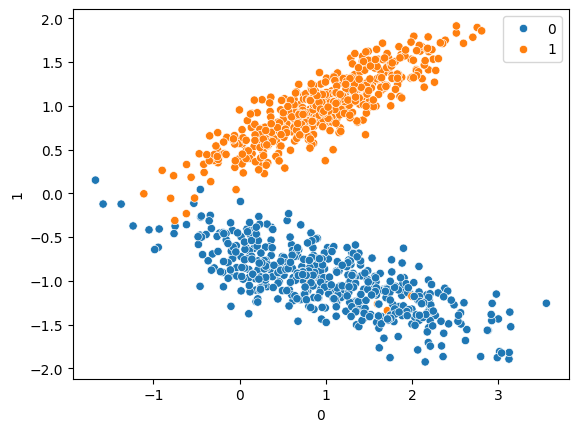

In [11]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1],hue=y)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [29]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
y_pred = svc.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.984

In [30]:
print(confusion_matrix(y_test,y_pred))

[[129   0]
 [  4 117]]


In [32]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       129
           1       1.00      0.97      0.98       121

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



### Hyperparameter Tuning

In [39]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_classes=2,
                           n_clusters_per_class=2,
                           n_redundant=0)

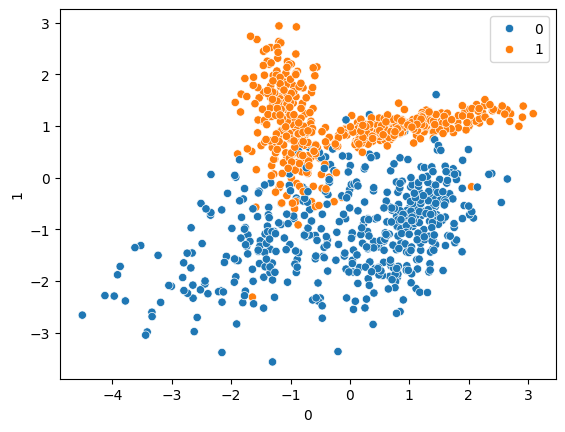

In [40]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1],hue=y)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
model = SVC()
params={
    'C': [0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf','linear','sigmoid','poly']
}

In [45]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=params,n_jobs=-1)

In [46]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly']})

In [47]:
y_pred = grid.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.952

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       111
           1       0.96      0.95      0.96       139

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [48]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}